In [33]:
import keras
import pickle
import pandas as pd
from keras.models import Sequential
#from keras.metrics import 
import keras
import keras.preprocessing.text
from __future__ import absolute_import
from __future__ import division



import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

import string
import sys
import numpy as np
import pandas as pd
from six.moves import range
from six.moves import zip
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree

In [2]:
file = open("data/noConst_and_OHE.p","rb")
originaldata = pd.read_csv('data/train.csv', index_col='ID')
testdata = pd.read_csv('data/test.csv',index_col='ID')

In [3]:
print(originaldata.iloc[[1]])

        y X0 X1  X2 X3 X4 X5 X6 X8  X10  ...   X375  X376  X377  X378  X379  \
ID                                       ...                                  
6   88.53  k  t  av  e  d  y  l  o    0  ...      1     0     0     0     0   

    X380  X382  X383  X384  X385  
ID                                
6      0     0     0     0     0  

[1 rows x 377 columns]


In [4]:
train = pd.read_csv('data/train.csv', index_col='ID')
y = train['y']
train.drop('y', axis=1, inplace=True)
test = pd.read_csv('data/test.csv', index_col='ID')
constcols_train = list(train.loc[:,train.apply(lambda i: len(i.unique()) == 1)].columns)
goodcols = list(set(train.columns).intersection(set(test.columns)) - set(constcols_train))
train = train[goodcols]
test = test[goodcols]
tot = pd.concat([train, test]).sort_index()
enumcols = list(tot.select_dtypes(include=['object']).columns)
bincols = list(tot.select_dtypes(include=['int64']).columns)

totOHE = pd.get_dummies(tot, columns=enumcols)
trainOHE = totOHE.loc[train.index]

testOHE = totOHE.loc[test.index]


In [5]:
print(testOHE.shape)
print(trainOHE.shape)

(4209, 567)
(4209, 567)


In [6]:
print(testOHE)

      X295  X42  X83  X231  X19  X288  X115  X254  X357  X372  ...   X6_c  \
ID                                                             ...          
1        0    0    0     0    0     0     0     0     0     0  ...      0   
2        0    0    0     0    1     0     0     0     0     0  ...      0   
3        0    0    0     0    0     0     0     0     0     0  ...      0   
4        0    0    0     0    0     0     0     0     0     0  ...      0   
5        0    0    0     0    0     0     0     0     0     0  ...      0   
8        0    0    0     0    1     0     1     0     0     0  ...      0   
10       0    0    0     0    0     0     0     0     0     0  ...      0   
11       0    0    0     0    0     0     0     0     0     0  ...      0   
12       0    0    0     0    0     0     0     0     0     0  ...      0   
14       0    0    0     0    0     0     0     0     0     0  ...      0   
15       0    0    0     0    0     0     0     0     0     0  ...      0   

In [7]:
print(trainOHE)

      X295  X42  X83  X231  X19  X288  X115  X254  X357  X372  ...   X6_c  \
ID                                                             ...          
0        0    0    0     0    0     0     0     0     0     0  ...      0   
6        0    0    0     0    0     0     0     0     0     0  ...      0   
7        0    0    0     0    0     0     0     0     0     0  ...      0   
9        0    0    0     0    0     0     0     0     0     1  ...      0   
13       0    0    0     0    0     0     0     0     0     0  ...      0   
18       0    0    0     0    0     0     0     0     0     0  ...      0   
24       0    0    0     0    0     0     1     0     0     0  ...      0   
25       0    0    0     0    0     0     0     0     0     0  ...      0   
27       0    0    0     0    0     0     0     0     0     0  ...      0   
30       0    0    0     0    0     0     0     0     0     0  ...      0   
31       0    0    0     0    0     0     0     0     0     0  ...      0   

In [8]:
matarr  = trainOHE.as_matrix()
testarr = testOHE.as_matrix()

In [11]:
matarr.shape

(4209, 567)

In [12]:
Input_Length = len(trainOHE.T) 

In [13]:
print(Input_Length)

567


In [14]:
X_train1 = matarr[:3000,:]
Y_train1 = y[:3000]
X_train2 = matarr[3000:,:]
Y_train2 = y[3000:]
x = matarr
y = y

In [15]:
print(X_train1.shape)
print(X_train2.shape)


(3000, 567)
(1209, 567)


In [37]:
#basic model

modelbasic = Sequential()
modelbasic.add(Dense(Input_Length,input_dim=Input_Length,kernel_initializer='normal', activation='relu'))
modelbasic.add(Dense(400, kernel_initializer='normal', activation='relu'))
modelbasic.add(Dense(500, kernel_initializer='normal', activation='relu'))
modelbasic.add(Dense(1))


modelbasic.compile(loss='mean_absolute_error', optimizer='adam')

In [38]:
#function model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',dropout=0.2))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [39]:
runJob = modelbasic.fit(X_train1, Y_train1, batch_size=1, epochs=10, verbose=1, shuffle=False)

Epoch 1/10
3000/3000 [==============================] - 22s - loss: 10.2022    
Epoch 2/10
3000/3000 [==============================] - 22s - loss: 7.9098    
Epoch 3/10
3000/3000 [==============================] - 22s - loss: 7.1786    
Epoch 4/10
3000/3000 [==============================] - 22s - loss: 6.8250    
Epoch 5/10
3000/3000 [==============================] - 21s - loss: 6.5607    
Epoch 6/10
3000/3000 [==============================] - 22s - loss: 6.4534    
Epoch 7/10
3000/3000 [==============================] - 21s - loss: 6.3280    
Epoch 8/10
3000/3000 [==============================] - 24s - loss: 6.2577    
Epoch 9/10
3000/3000 [==============================] - 24s - loss: 6.1308    
Epoch 10/10
3000/3000 [==============================] - 22s - loss: 5.9274    


In [23]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [34]:
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)



NameError: name 'X_train' is not defined

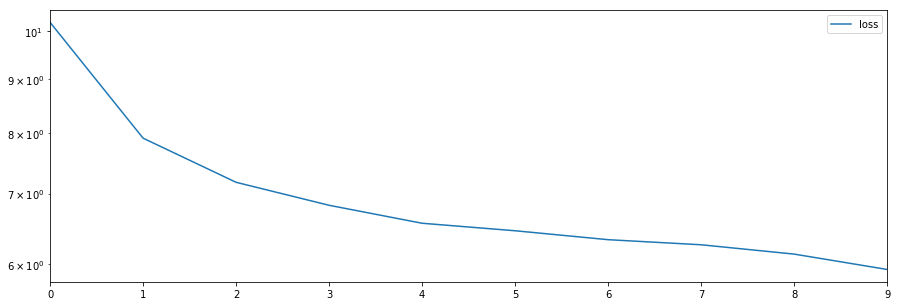

In [40]:
pd.DataFrame(runJob.history).plot(secondary_y='lr', figsize=(15,5), logy=True, grid=False);
plt.show();

In [41]:
r2_score(Y_train2, modelbasic.predict(X_train2))

0.57251312249645858

In [42]:
pd.DataFrame(index=testOHE.index, data=modelbasic.predict(testarr), columns=['y']).to_csv('submissionNick5.csv')

In [91]:
variablie = modelbasic.predict(testarr)

In [92]:
print(variablie)

[[  74.76895142]
 [  92.1783371 ]
 [  77.79068756]
 ..., 
 [  97.84439087]
 [ 113.71087646]
 [  91.9430542 ]]
